In [1]:
!pip install matplotlib sklearn tensorflow tensorflow-gpu


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv','train.csv')

'jigsaw-toxic-comment-classification-challenge\\train.csv\\train.csv'

In [4]:
df=pd.read_csv('train.csv',)

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [7]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [8]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.3.0
aiofiles                     23.1.0
aiohttp                      3.8.4
aiosignal                    1.3.1
altair                       4.2.0
anyio                        3.6.2
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.1.0
astunparse                   1.6.3
async-generator              1.10
async-timeout                4.0.2
attrs                        22.1.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
blinker                      1.5
Brotli                       1.0.9
cachetools                   5.2.0
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
click                        8.1.3
colorama                     0.4.6
commonmark                   0.9.1
contourpy                    1.0.6
cycle


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from tensorflow.keras.layers import TextVectorization

In [10]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [11]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [12]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [13]:
MAX_FEATURES = 200000 #number of words in vocab

In [14]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                              output_sequence_length=1800,
                              output_mode='int')

In [15]:
vectorizer.adapt(X.values)

In [16]:
vectorizer('doing project is good work')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([272, 467,   9,  98, 141], dtype=int64)>

In [17]:
vectorized_text = vectorizer(X.values)

In [18]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  643,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2506, ...,     0,     0,     0],
       [  425,   440,    70, ...,     0,     0,     0],
       ...,
       [32141,  7329,   383, ...,     0,     0,     0],
       [    5,    12,   533, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [19]:
#MCSHBAP - map, cache, shuffe, batch, prefetch 
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [20]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [21]:
batch_X.shape

(16, 1800)

In [22]:
batch_y.shape

(16, 6)

In [23]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) # validation
test =dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [24]:
len(train)

6981

In [25]:
len(test)

997

In [26]:
len(val)

1994

In [27]:
train_generator = train.as_numpy_iterator()

In [28]:
train_generator.next()

(array([[  167,   803,   123, ...,     0,     0,     0],
        [    5,    35,     2, ...,     0,     0,     0],
        [    8,   221,    10, ...,     0,     0,     0],
        ...,
        [   23,    48,   153, ...,     0,     0,     0],
        [ 1389, 10584,   170, ...,     0,     0,     0],
        [62872,  6191,    11, ...,     0,     0,     0]], dtype=int64),
 array([[1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [30]:
model = Sequential()
model.add(Embedding(MAX_FEATURES+1,32))
model.add(Bidirectional(LSTM(32, activation='tanh'))) 
model.add(Dense(128, activation='relu')) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [31]:
model.compile(loss= 'BinaryCrossentropy', optimizer= 'Adam', metrics= 'accuracy')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [33]:
history = model.fit(train, epochs=30, validation_data=val)

Epoch 1/30
6981/6981 [==============================] - 1494s 213ms/step - loss: 0.0630 - accuracy: 0.9817 - val_loss: 0.0472 - val_accuracy: 0.9941
Epoch 2/30
6981/6981 [==============================] - 1838s 263ms/step - loss: 0.0458 - accuracy: 0.9941 - val_loss: 0.0413 - val_accuracy: 0.9943
Epoch 3/30
6981/6981 [==============================] - 1588s 227ms/step - loss: 0.0410 - accuracy: 0.9937 - val_loss: 0.0349 - val_accuracy: 0.9940
Epoch 4/30
6981/6981 [==============================] - 1680s 241ms/step - loss: 0.0357 - accuracy: 0.9912 - val_loss: 0.0301 - val_accuracy: 0.9942
Epoch 5/30
6981/6981 [==============================] - 1693s 242ms/step - loss: 0.0321 - accuracy: 0.9938 - val_loss: 0.0283 - val_accuracy: 0.9945
Epoch 6/30
6981/6981 [==============================] - 1691s 242ms/step - loss: 0.0287 - accuracy: 0.9937 - val_loss: 0.0250 - val_accuracy: 0.9933
Epoch 7/30
6981/6981 [==============================] - 1695s 243ms/step - loss: 0.0257 - accuracy: 0.9934

In [34]:
history.history

{'loss': [0.063001848757267,
  0.045806434005498886,
  0.04096529260277748,
  0.03568942844867706,
  0.03212945535778999,
  0.02866480126976967,
  0.025739924982190132,
  0.022803016006946564,
  0.020784225314855576,
  0.018197784200310707,
  0.016551390290260315,
  0.015144073404371738,
  0.013808383606374264,
  0.012581193819642067,
  0.01120645459741354,
  0.01035718247294426,
  0.009071185253560543,
  0.00835742149502039,
  0.007992146536707878,
  0.007188428193330765,
  0.006684593856334686,
  0.006481267511844635,
  0.005733760539442301,
  0.005858988501131535,
  0.005054841749370098,
  0.0049643926322460175,
  0.004599064122885466,
  0.004410953726619482,
  0.004156999755650759,
  0.0040955087170004845],
 'accuracy': [0.9816734790802002,
  0.994135856628418,
  0.9936971664428711,
  0.9911993145942688,
  0.9938046336174011,
  0.9937151074409485,
  0.9933659434318542,
  0.9924169182777405,
  0.9908590912818909,
  0.9884507656097412,
  0.9879852533340454,
  0.9880210757255554,
  0.

In [35]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

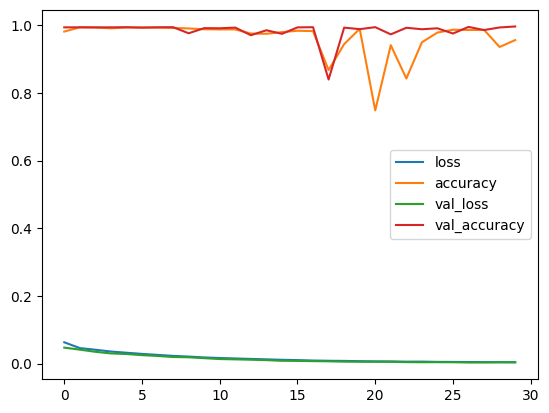

In [36]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [37]:
input_text = vectorizer('You freaking suck ! I am going to kill you')

In [38]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7113,  396, ...,    0,    0,    0], dtype=int64)>

In [39]:
model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 578ms/step


array([[1.        , 0.47289047, 0.99939823, 0.93153805, 0.99448216,
        0.01678332]], dtype=float32)

In [40]:
batch = test.as_numpy_iterator().next()

In [41]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [42]:
res = model.predict(batch_X)

1/1 [==============================] - 0s 83ms/step


In [43]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 61ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [44]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [45]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [46]:
pre = Precision()
re = Recall()
acc =  CategoricalAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 72ms/step


In [48]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9740078449249268, Recall:0.9872521162033081, Accuracy:0.5927783250808716


In [49]:
!pip install gradio jinja2


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import tensorflow as tf
import gradio as gr

C:\Users\rajva\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [51]:
model.save('toxic.h5')

In [52]:
input_str = vectorizer('hey i freaking hate you')

In [53]:
model = tf.keras.models.load_model('toxic.h5')

In [54]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 540ms/step


In [55]:
res

array([[0.9947865 , 0.28295225, 0.5922574 , 0.08114263, 0.73394513,
        0.17239551]], dtype=float32)

In [56]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [57]:
interface = gr.Interface(fn=score_comment, inputs=gr.components.Textbox(lines=2, placeholder='Comment to score'), outputs='text')

In [1]:
interface.launch(share=True)

NameError: name 'interface' is not defined